<a href="https://colab.research.google.com/github/ayushranjan6456/Birthday-Wisher/blob/master/Hydrogen_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/interpolated_merged.csv')

#Drop the unnamed column with index of all 7 cycles individually
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df= df[df['Gas'] != 0]

df

,time,pH,VFA,COD,Gas
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
5,1.206030,5.989551,3.315920,11.308109,0.966157
...,...,...,...,...,...
1395,47.035176,4.947926,4.731427,6.214625,44.151661
1396,47.276382,4.936978,4.742158,6.144786,44.818456
1397,47.517588,4.925355,4.753809,6.072439,45.514966
1398,47.758794,4.913037,4.766412,5.997529,46.241908


Text(0.5, 1.0, 'Gas vs COD')

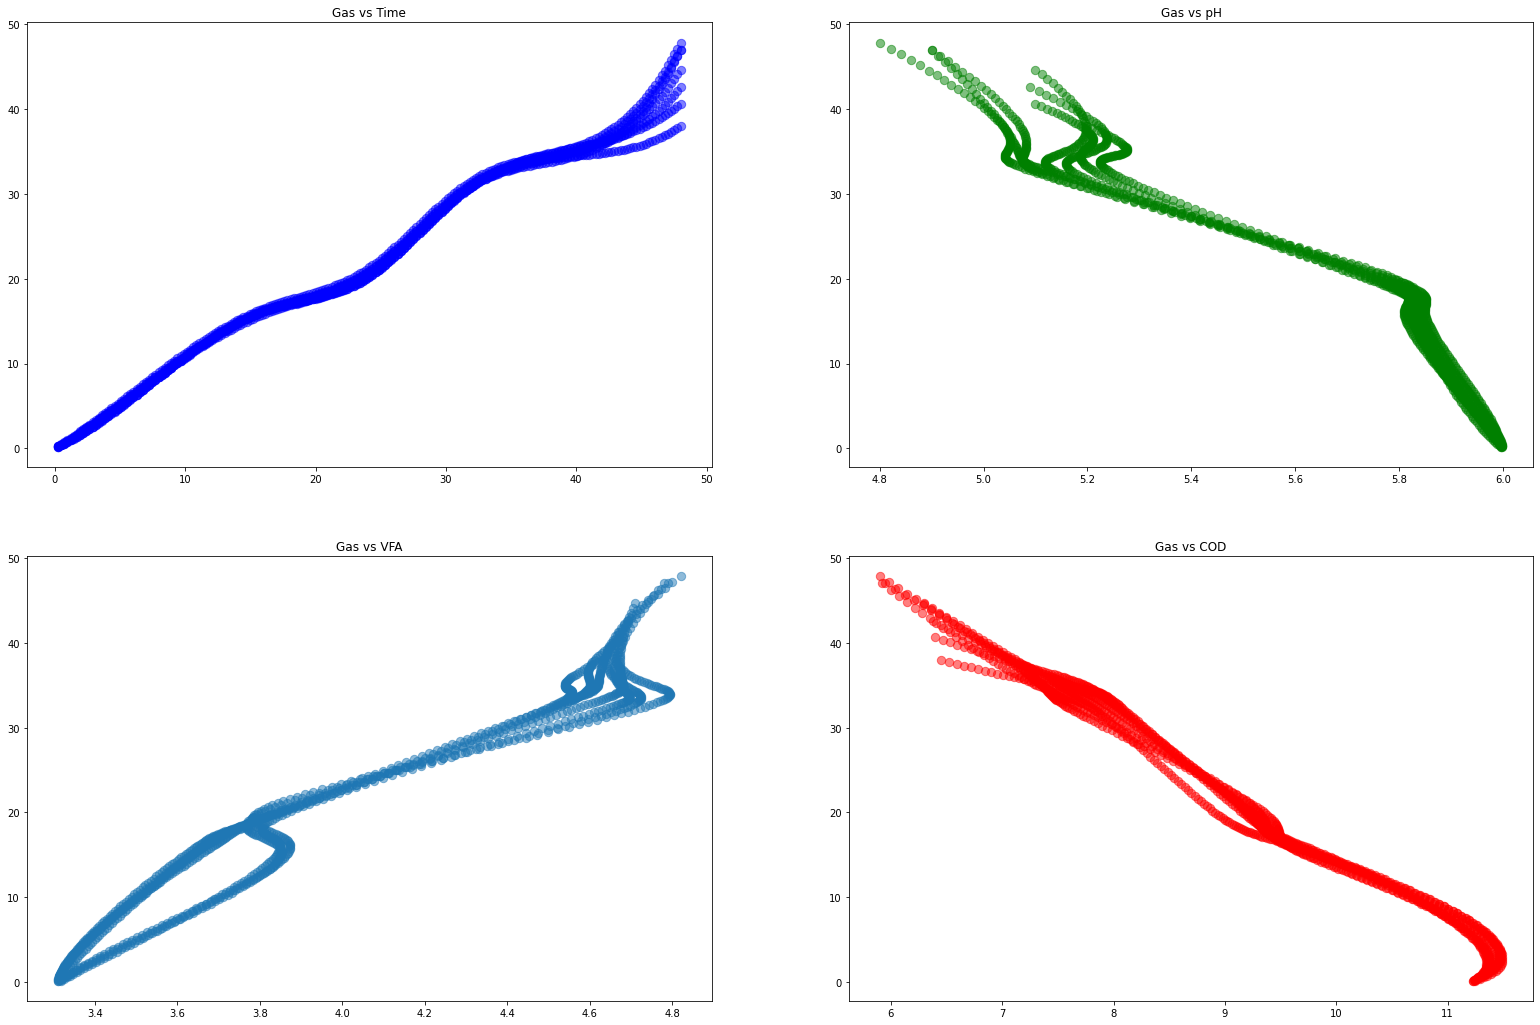

In [6]:

f = plt.figure()
f.set_figwidth(27)
f.set_figheight(18)
x1=df['time']
x2=df['pH']
x3=df['VFA']
x4=df['COD']
y=df['Gas']

plt.subplot(2, 2, 1)
plt.scatter(x1, y, c='blue', s=70, alpha=0.5)
plt.title("Gas vs Time")

plt.subplot(2, 2, 2)
plt.scatter(x2, y, c='green', s=70, alpha=0.5)
plt.title("Gas vs pH")

plt.subplot(2, 2, 3)
plt.scatter(x3, y, s=70, alpha=0.5)
plt.title("Gas vs VFA")

plt.subplot(2, 2, 4)
plt.scatter(x4, y, c='red', s=70, alpha=0.5)
plt.title("Gas vs COD")

In [7]:
#Correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='RdYlBu')

,time,pH,VFA,COD,Gas
time,1.000000,-0.941326,0.960240,-0.990564,0.993265
pH,-0.941326,1.000000,-0.982841,0.942201,-0.955536
VFA,0.960240,-0.982841,1.000000,-0.962853,0.971902
COD,-0.990564,0.942201,-0.962853,1.000000,-0.993052
Gas,0.993265,-0.955536,0.971902,-0.993052,1.000000


# Splitting the dataset into training and testing

In [8]:
from sklearn.model_selection import train_test_split

# input
x = df.iloc[:, [0,1,2,3]].values

# output
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

# Now, it is very important to perform feature scaling here because pH, time, COD, VFA values lie in different ranges. 
# If we don’t scale the features then the some features will dominate the other when the model finds the nearest neighbor to a data point in the data space. 
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

#Here all features values are scaled so now mean = 0 and S.D = 1.
print (X_train[0:10, :])


[[ 1.66281309 -1.77728055  1.40353546 -1.89947805]
 [-1.07490821  0.96692001 -1.13083937  1.17594961]
 [ 0.7560519  -1.26726694  1.25496856 -0.85993888]
 [ 1.61049995 -1.12794053  1.22997899 -1.53090908]
 [-1.24928536  0.99444755 -0.96265739  1.37745158]
 [ 0.09341872  0.24505702 -0.18055782 -0.01503312]
 [-0.62152761  0.72841193 -0.86050095  0.49141453]
 [ 1.01761763 -1.39832783  1.30509381 -1.00797289]
 [-0.84821791  0.8935678  -0.95744152  0.7853682 ]
 [ 1.1048062  -1.47946053  1.38355757 -1.14446308]]


# Train the ML model (Linear Regression)

In [20]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
# regression coefficients
print('Coefficients: ', reg.coef_)

y_pred = reg.predict(X_test)
  
# variance score: 1 means perfect prediction
print('\nVariance score: {}\n'.format(reg.score(X_test, y_test)))

from sklearn import metrics

err = (y_test - y_pred)/y_test

abs_err = np.abs(err)

MAPE = np.mean(abs_err) * 100

Accuracy = 100 - MAPE

print('Mean Absolute error: {}\n'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('Mean Squared error: {}\n'.format(metrics.mean_squared_error(y_test,y_pred)))
print('Root Mean Squared error: {}\n'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

print('Accuracy: {}\n'.format(Accuracy))




Coefficients:  [ 5.3691019  -0.84440279  1.29707907 -4.52758662]

Variance score: 0.9927104245013817

Mean Absolute error: 0.7896431142192661

Mean Squared error: 1.0769547690387622

Root Mean Squared error: 1.037764312856615

Accuracy: 79.53837442328508



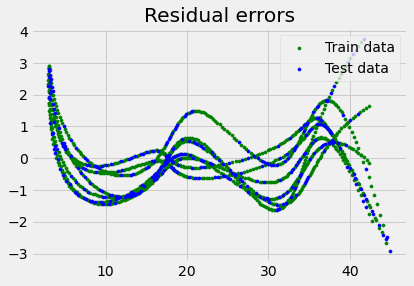

In [11]:
## plotting residual errors in training data
# A residual is a measure of how far away a point is vertically from the regression line. 
# Simply, it is the error between a predicted value and the observed actual value.

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
# plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

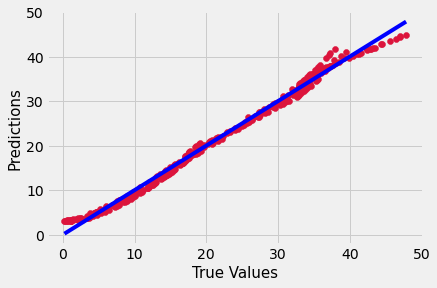

In [21]:

plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

# Training the ML Model (Random Forest)

In [13]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
#n_estimator -> specifies the number of trees in the forest of the model., 
#random_state -> controls the randomness of the bootstrapping of the samples used when building trees.

scores = []
for k in range(15, 255):
  regressor = RandomForestRegressor(n_estimators = k, random_state = 6)

  regressor.fit(X_train, y_train)
  predictions = regressor.predict(X_test)
  errors = abs(predictions - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  if(accuracy<80) : scores.append(0)
  else : scores.append(round(accuracy, 2))


RandomForestRegressor(n_estimators=170, random_state=6)

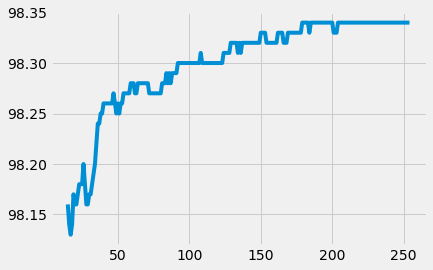

In [14]:
plt.plot(range(15, 255), scores)

regressor = RandomForestRegressor(n_estimators = 170, random_state = 6)
regressor.fit(X_train, y_train)

In [15]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)

# Calculate mean absolute error (mae)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('\nAccuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.19

Accuracy: 98.33 %.


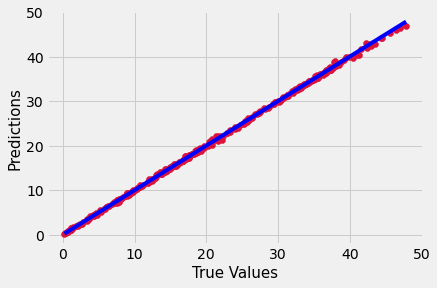

In [22]:

plt.scatter(y_test, predictions, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

#Hyperparamter Tuning

In [16]:
1/0
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

ZeroDivisionError: ignored

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.\n'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 15, random_state = 21)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
